In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing	import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, fbeta_score
# Importamos todas las librerias que usaremos para trabajar.

In [2]:
df_trains = pd.read_csv(r'hospitalizaciones_train.csv')
# Cargamos los DataFrame

In [3]:
trains = df_trains.copy()
# Realizamos una copia a df_trains para realizar cambios sin modificar la informacion original.

In [4]:
train = trains.rename(columns={trains.columns[0]: 'Habitaciones Disponibles',
                                            trains.columns[1]: 'Area Atencion',
                                            trains.columns[2]: 'Codigo Habitacion',
                                            trains.columns[3]: 'Nombre Dr',
                                            trains.columns[4]: 'Personal Disponible',
                                            trains.columns[5]: 'Id Paciente',
                                            trains.columns[6]: 'Edad',
                                            trains.columns[7]: 'Genero',
                                            trains.columns[8]: 'Tipo Ingreso',
                                            trains.columns[9]: 'Gravedad Estado',
                                            trains.columns[10]: 'Condicion Salud',
                                            trains.columns[11]: 'Visitas',
                                            trains.columns[12]: 'Seguro Salud',
                                            trains.columns[13]: 'Deposito Administrativo',
                                            trains.columns[14]: 'Dias Estadia'})
# Renombro las columnas para trabajar con mayor comodidad.

In [5]:
train.head()
# Reviso el DF

,Habitaciones Disponibles,Area Atencion,Codigo Habitacion,Nombre Dr,Personal Disponible,Id Paciente,Edad,Genero,Tipo Ingreso,Gravedad Estado,Condicion Salud,Visitas,Seguro Salud,Deposito Administrativo,Dias Estadia
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [6]:
train.info()
# Inicio el proceso EDA.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Habitaciones Disponibles  410000 non-null  int64  
 1   Area Atencion             410000 non-null  object 
 2   Codigo Habitacion         410000 non-null  object 
 3   Nombre Dr                 410000 non-null  object 
 4   Personal Disponible       410000 non-null  int64  
 5   Id Paciente               410000 non-null  int64  
 6   Edad                      410000 non-null  object 
 7   Genero                    410000 non-null  object 
 8   Tipo Ingreso              410000 non-null  object 
 9   Gravedad Estado           410000 non-null  object 
 10  Condicion Salud           410000 non-null  object 
 11  Visitas                   410000 non-null  int64  
 12  Seguro Salud              410000 non-null  object 
 13  Deposito Administrativo   410000 non-null  f

In [7]:
train[train.duplicated()]
# Busco valores duplicados

,Habitaciones Disponibles,Area Atencion,Codigo Habitacion,Nombre Dr,Personal Disponible,Id Paciente,Edad,Genero,Tipo Ingreso,Gravedad Estado,Condicion Salud,Visitas,Seguro Salud,Deposito Administrativo,Dias Estadia


In [8]:
print("La cantidad de registros duplicados es: ", train.duplicated().sum())
# Comprobamos la Cantidad de registros duplicados.

La cantidad de registros duplicados es:  0


In [9]:
train.isna().sum()                  # Chequeamos los valores Nulos.

Habitaciones Disponibles    0
Area Atencion               0
Codigo Habitacion           0
Nombre Dr                   0
Personal Disponible         0
Id Paciente                 0
Edad                        0
Genero                      0
Tipo Ingreso                0
Gravedad Estado             0
Condicion Salud             0
Visitas                     0
Seguro Salud                0
Deposito Administrativo     0
Dias Estadia                0
dtype: int64

In [10]:
train = train.drop(['Habitaciones Disponibles','Codigo Habitacion','Id Paciente','Visitas'], axis = 1)
# Elimino estas columnas porque de momento no es necesaria o es carente de informacion adicional.

In [11]:
train["Genero"] = train ["Genero"] == 'Female'
# Remplazo los generos por datos booleanos para poder convertirlos en datos de tipo "int". Los valores "Female" = True. "Male" = False

In [12]:
train["Genero"] = train["Genero"].replace([True,False],[1,0])
# Ahora remplazo los valores True (Female) = 1. y False (Male) = 0
train.head()

,Area Atencion,Nombre Dr,Personal Disponible,Edad,Genero,Tipo Ingreso,Gravedad Estado,Condicion Salud,Seguro Salud,Deposito Administrativo,Dias Estadia
0,gynecology,Dr Sophia,0,41-50,1,Trauma,Extreme,Diabetes,Yes,2966.408696,8
1,gynecology,Dr Sophia,2,31-40,1,Trauma,Minor,Heart disease,No,3554.835677,9
2,gynecology,Dr Sophia,8,21-30,1,Trauma,Extreme,Diabetes,Yes,5624.733654,7
3,gynecology,Dr Olivia,7,31-40,1,Urgent,Moderate,None,No,4814.149231,8
4,anesthesia,Dr Mark,10,71-80,0,Trauma,Moderate,Diabetes,No,5169.269637,34


In [13]:
train["Target"]=train["Dias Estadia"]>8
# Los valores mayores a 8 serán True y los menores False.
train["Target"]=train["Target"].replace([True,False],[1,0])
# Se reemplaza los valores True (>8) = "1" y False = "0"

In [14]:
train["Target"].value_counts()
# Esto indica que es un dataset desbalanceado, que los registros son:
# 255.416 = "Estadia Larga" y 154.584 = "Estadia Corta".

1    255416
0    154584
Name: Target, dtype: int64

In [15]:
enc = OrdinalEncoder()
train.columns
# Le asigno al encoder una variable para poder utilizarlo. Chequeo las columnas para generar el encoding.

Index(['Area Atencion', 'Nombre Dr', 'Personal Disponible', 'Edad', 'Genero',
       'Tipo Ingreso', 'Gravedad Estado', 'Condicion Salud', 'Seguro Salud',
       'Deposito Administrativo', 'Dias Estadia', 'Target'],
      dtype='object')

In [16]:
enc.fit(train[['Area Atencion', 'Nombre Dr', 'Personal Disponible', 'Edad',
       'Tipo Ingreso', 'Gravedad Estado', 'Condicion Salud', 'Seguro Salud',
       'Deposito Administrativo', 'Dias Estadia', 'Target']])
# Realizamos el encoding, esto quiere decir que los datos de tipo "object" les generamos un corigo numerico de tipo (int)
# para que el modelo de prediccion pueda trabajar con la informacion

OrdinalEncoder()

In [17]:
train[['Area Atencion', 'Nombre Dr', 'Personal Disponible', 'Edad',
       'Tipo Ingreso', 'Gravedad Estado', 'Condicion Salud', 'Seguro Salud',
       'Deposito Administrativo', 'Dias Estadia', 'Target']] = enc.transform(train[['Area Atencion', 'Nombre Dr', 'Personal Disponible', 'Edad',
       'Tipo Ingreso', 'Gravedad Estado', 'Condicion Salud', 'Seguro Salud',
       'Deposito Administrativo', 'Dias Estadia', 'Target']])

In [18]:
df_tt = pd.concat([train.iloc[:,:12], df_trains.select_dtypes(np.number)], axis = 1)
# Concateno la tabla de valores de codigo numerico junto a la original.

In [19]:
df_tt.head()

,Area Atencion,Nombre Dr,Personal Disponible,Edad,Genero,Tipo Ingreso,Gravedad Estado,Condicion Salud,Seguro Salud,Deposito Administrativo,Dias Estadia,Target,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
0,2.0,8.0,0.0,4.0,1,1.0,0.0,1.0,1.0,11165.0,5.0,0.0,4,0,33070,4,2966.408696,8
1,2.0,8.0,2.0,3.0,1,1.0,1.0,2.0,0.0,36653.0,6.0,1.0,4,2,34808,2,3554.835677,9
2,2.0,8.0,8.0,2.0,1,1.0,0.0,1.0,1.0,350018.0,4.0,0.0,2,8,44577,2,5624.733654,7
3,2.0,4.0,7.0,3.0,1,2.0,2.0,4.0,0.0,255384.0,5.0,0.0,4,7,3695,4,4814.149231,8
4,1.0,2.0,10.0,7.0,0,1.0,2.0,1.0,0.0,316256.0,31.0,1.0,2,10,108956,2,5169.269637,34


In [20]:
X= df_tt[['Edad','Genero','Tipo Ingreso','Gravedad Estado']]
y= df_tt['Target']
# Selecciones las variables que quiero usar para pronosticar.

#Con las variables "['Edad','Genero','Tipo Ingreso','Gravedad Estado']" obtuve un resultado de: 
# Accuracy del modelo de Reg. Logistica :    0.558
#Recall del modelo de Reg. Logistica :      0.471

In [21]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 123)
#Dividir los datos previamente seleccinados para realizar el entrenamiento y testeo futuro. 

In [22]:
lr = LogisticRegression(penalty='l2', 
                        class_weight='balanced'
                       )
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)

# Modelos deregresion logistica (** No tenemos idea que ons los parametros, cualqueir cosa los borramos :p )

Text(50.722222222222214, 0.5, 'Reales')

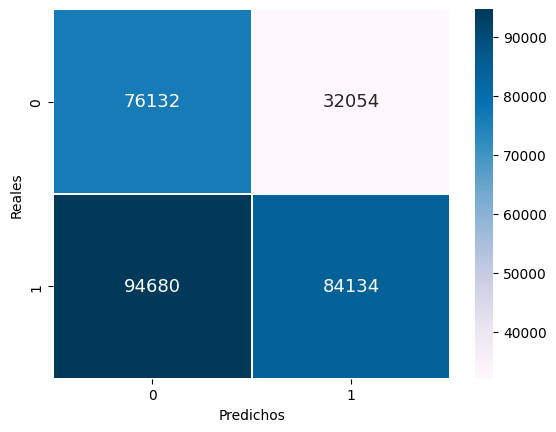

In [23]:
model_name = 'Reg. Logistica'

sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [24]:
print('Accuracy del modelo de ' + model_name + ' :   ', accuracy_score(y_train, y_train_pred).round(3))
print('Recall del modelo de ' + model_name + ' :     ', recall_score(y_train, y_train_pred).round(3))

print('Rporte del modelo de ' + model_name + ' :   \n', classification_report(y_train, y_train_pred))

Accuracy del modelo de Reg. Logistica :    0.558
Recall del modelo de Reg. Logistica :      0.471
Rporte del modelo de Reg. Logistica :   
               precision    recall  f1-score   support

         0.0       0.45      0.70      0.55    108186
         1.0       0.72      0.47      0.57    178814

    accuracy                           0.56    287000
   macro avg       0.58      0.59      0.56    287000
weighted avg       0.62      0.56      0.56    287000



In [25]:
df_tests = pd.read_csv(r'hospitalizaciones_test.csv')
tests = df_tests.copy()

In [26]:
test = tests.rename(columns={tests.columns[0]: 'Habitaciones Disponibles',
                                            tests.columns[1]: 'Area Atencion',
                                            tests.columns[2]: 'Codigo Habitacion',
                                            tests.columns[3]: 'Nombre Dr',
                                            tests.columns[4]: 'Personal Disponible',
                                            tests.columns[5]: 'Id Paciente',
                                            tests.columns[6]: 'Edad',
                                            tests.columns[7]: 'Genero',
                                            tests.columns[8]: 'Tipo Ingreso',
                                            tests.columns[9]: 'Gravedad Estado',
                                            tests.columns[10]: 'Condicion Salud',
                                            tests.columns[11]: 'Visitas',
                                            tests.columns[12]: 'Seguro Salud',
                                            tests.columns[13]: 'Deposito Administrativo'})

In [27]:
test = test.drop(['Habitaciones Disponibles','Codigo Habitacion','Id Paciente','Visitas'], axis = 1)
test["Genero"] = test ["Genero"] == 'Female'
test["Genero"] = test["Genero"].replace([True,False],[1,0])

In [28]:
enc.fit(test[['Area Atencion', 'Nombre Dr', 'Personal Disponible', 'Edad',
       'Tipo Ingreso', 'Gravedad Estado', 'Condicion Salud', 'Seguro Salud',
       'Deposito Administrativo']])

OrdinalEncoder()

In [29]:
test[['Area Atencion', 'Nombre Dr', 'Personal Disponible', 'Edad',
       'Tipo Ingreso', 'Gravedad Estado', 'Condicion Salud', 'Seguro Salud',
       'Deposito Administrativo']] = enc.transform(test[['Area Atencion', 'Nombre Dr', 'Personal Disponible', 'Edad',
       'Tipo Ingreso', 'Gravedad Estado', 'Condicion Salud', 'Seguro Salud',
       'Deposito Administrativo']])

In [30]:
df_test = pd.concat([test, df_tests.select_dtypes(np.number)], axis = 1)

In [31]:
df_test.head()

,Area Atencion,Nombre Dr,Personal Disponible,Edad,Genero,Tipo Ingreso,Gravedad Estado,Condicion Salud,Seguro Salud,Deposito Administrativo,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit
0,2.0,4.0,10.0,2.0,1,1.0,2.0,5.0,0.0,52469.0,3,10,2858,2,4749.640225
1,0.0,1.0,4.0,5.0,1,1.0,2.0,0.0,1.0,24227.0,2,4,65657,2,4122.261324
2,3.0,1.0,7.0,5.0,0,1.0,2.0,4.0,0.0,75017.0,2,7,45598,3,5459.067882
3,2.0,4.0,1.0,2.0,1,1.0,2.0,4.0,1.0,19861.0,2,1,31132,2,3987.033318
4,1.0,1.0,7.0,5.0,1,1.0,0.0,1.0,0.0,53798.0,2,7,125021,2,4770.789695


In [32]:
y_train_pred = lr.predict(df_test[['Edad','Genero','Tipo Ingreso','Gravedad Estado']])
prediccion_Lr = y_train_pred
resultado = pd.DataFrame(prediccion_Lr)         
resultado.set_axis(["pred"], axis = 1,inplace = True)
resultado.to_csv("lulo76.csv", index = False)